In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
# Load the data
df = pd.read_csv("insurance_data.csv")

# Preview the data
print(df.head())
print("\nDataset Info:")
print(df.info())

   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes
None


In [39]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Basic statistics
print("\nStatistics:\n", df.describe())


Missing Values:
 age                 0
bought_insurance    0
dtype: int64

Statistics:
              age  bought_insurance
count  27.000000         27.000000
mean   39.666667          0.518519
std    15.745573          0.509175
min    18.000000          0.000000
25%    25.000000          0.000000
50%    45.000000          1.000000
75%    54.500000          1.000000
max    62.000000          1.000000


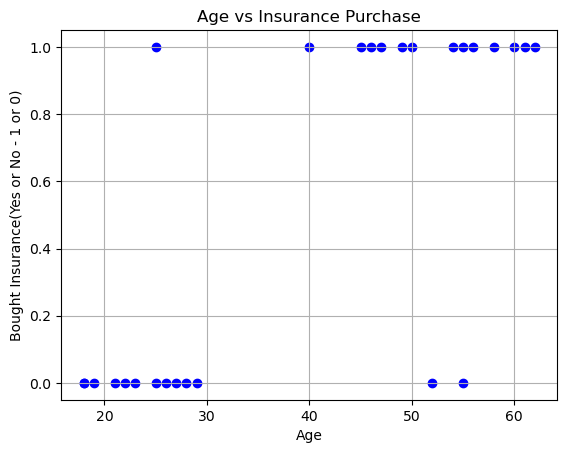

In [40]:
plt.scatter(df['age'], df['bought_insurance'], color='blue')
plt.xlabel('Age')
plt.ylabel('Bought Insurance(Yes or No - 1 or 0)')
plt.title('Age vs Insurance Purchase')
plt.grid(True)
plt.show()

In [41]:
X = df[['age']]
y = df['bought_insurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 1)
(6, 1)
(21,)
(6,)


In [42]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
# Predict on test data
y_pred = model.predict(X_test)

# Show predictions
print("Predicted:", y_pred.tolist())
print("Actual:   ", y_test.tolist())

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Predicted: [1, 0, 1, 0, 0, 0]
Actual:    [1, 0, 1, 0, 0, 0]
Accuracy: 1.0
Confusion Matrix:
 [[4 0]
 [0 2]]


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


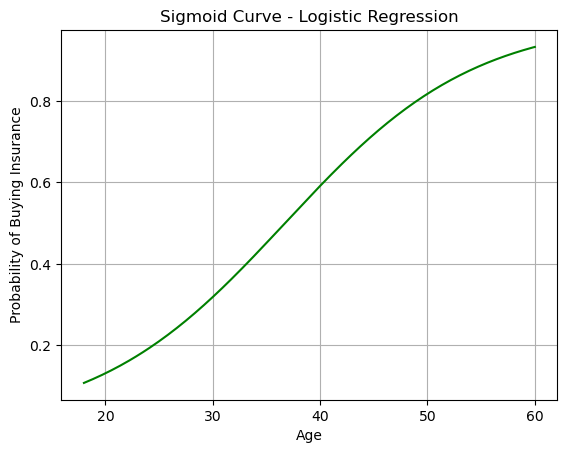

In [44]:
ages = np.linspace(18, 60, 200).reshape(-1, 1)
probs = model.predict_proba(ages)[:, 1]

plt.plot(ages, probs, color='green')
plt.xlabel('Age')
plt.ylabel('Probability of Buying Insurance')
plt.title('Sigmoid Curve - Logistic Regression')
plt.grid(True)
plt.show()
